### Snow Proclivity Analysis
Elements Of Data Science
December 2021


In [245]:
# Import Numpy and Datascience modules.
import numpy as np
from datascience import *
import pandas as pd

# Plotting 
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
%matplotlib inline

#### Tools

In [246]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

##### Apply tools to snow proclivity class data

In [247]:
import pandas as pd
url = "Snow Proclivity Survey (Responses) - Form Responses 1.csv"
snow_df = pd.read_csv(url)
snow_T = Table.from_df(snow_df) # Reading and converting using pandas dataframe
snow = Table.read_table(url)
snow

Timestamp,Do you like snow? (Answer Yes or No),What month were you born in?,What state or country did you grow up in?,Introvert or extrovert?,"Did you grow up in a rural, suburban, or urban environment?",Do you shovel snow where you currently live?,How far do you travel by car annually (best estimate on scale)?,Temple Major,Enjoy Coding?,Favorite Sport,Age
12/1/2021 11:04:11,Yes,April,Alaska,3,Rural,Yes,7,Chemistry,5,Nordic skiing,22
12/1/2021 11:56:20,Yes,April,Pennsylvania,3,Suburban,Yes,4,Graphic design,2,Other,19
12/1/2021 11:56:21,Yes,February,Maryland,4,Suburban,Yes,6,Biology,4,Soccer,19
12/1/2021 11:57:54,No,April,Pennsylvania,2,Urban,No,5,Biology,4,Tennis,18
12/1/2021 11:58:42,Yes,August,Pennsylvania,2,Suburban,Yes,6,Biochemistry,3,Gymnastics,18
12/1/2021 11:59:28,Yes,February,Vermont,4,Suburban,Yes,10,Environmental Science,2,Other,20
12/1/2021 12:01:26,Yes,November,New Jersey,2,Suburban,Yes,3,Biology,4,Rugby,18
12/1/2021 12:01:42,Yes,August,New Jersey,3,Suburban,Yes,9,Biology,2,Basketball,18
12/1/2021 12:02:06,No,May,Pennsylvania,1,Suburban,Yes,10,Biology,2,Baseball,18
12/1/2021 12:02:20,Yes,July,Outside US,1,Urban,No,1,Biochemistry,4,Tennis,22


In [248]:
snow.group("Do you like snow? (Answer Yes or No)")

Do you like snow? (Answer Yes or No),count
No,15
Yes,61


In [249]:
snow.sort("Favorite Sport", descending=False).group("Favorite Sport")

Favorite Sport,count
Alpine skiing,1
Badminton,6
Baseball,1
Basketball,12
Crew,1
Fencing,1
Field Hockey,1
Football,7
Golf,2
Gymnastics,3


In [250]:
url = "state_data.csv"
state_df = pd.read_csv(url)
state_T = Table.from_df(state_df) # Reading and converting using pandas dataframe
state = Table.read_table(url)
state

Average Temperature °F,State,Population
62.68,Alabama,"4,817,678"
32.03,Alaska,"728,300"
65.97,Arizona,"6,561,516"
60.09,Arkansas,"2,947,036"
61.17,California,"38,066,920"
46.26,Colorado,"5,197,580"
48.6,Connecticut,"3,592,053"
54.48,Delaware,"917,060"
54.73,District of Columbia,"633,736"
71.8,Florida,"19,361,792"


In [251]:
url = "month_temp.csv"
month_df = pd.read_csv(url)
month_T = Table.from_df(state_df) # Reading and converting using pandas dataframe
month = Table.read_table(url)
month

month,bmonth_temp
January,-10.2
February,-7.7
March,-4.1
April,1.9
May,8.1
June,12.5
July,14.5
August,13.4
September,9
October,1.4


#### Join survey and state data

In [252]:
snow_data = snow.join("What state or country did you grow up in?",state,"State")
snow_data = snow_data.join("What month were you born in?",month,"month")
snow_data

What month were you born in?,What state or country did you grow up in?,Timestamp,Do you like snow? (Answer Yes or No),Introvert or extrovert?,"Did you grow up in a rural, suburban, or urban environment?",Do you shovel snow where you currently live?,How far do you travel by car annually (best estimate on scale)?,Temple Major,Enjoy Coding?,Favorite Sport,Age,Average Temperature °F,Population,bmonth_temp
April,Alaska,12/1/2021 11:04:11,Yes,3,Rural,Yes,7,Chemistry,5,Nordic skiing,22,32.03,"728,300",1.9
April,Maryland,12/1/2021 22:14:35,Yes,1,Suburban,No,5,Computer Science,3,Other,18,54.61,"5,887,776",1.9
April,Outside US,12/1/2021 19:06:42,Yes,2,Rural,Yes,4,Computer science,4,Other,18,58.6,"7,550,000,000",1.9
April,Pennsylvania,12/1/2021 11:56:20,Yes,3,Suburban,Yes,4,Graphic design,2,Other,19,49.8,"12,758,729",1.9
April,Pennsylvania,12/1/2021 11:57:54,No,2,Urban,No,5,Biology,4,Tennis,18,49.8,"12,758,729",1.9
April,Pennsylvania,12/1/2021 12:17:28,No,5,Suburban,Yes,8,Health Professions,1,Softball,18,49.8,"12,758,729",1.9
April,Pennsylvania,12/1/2021 18:38:18,No,3,Urban,No,6,Biochemistry,3,Soccer,18,49.8,"12,758,729",1.9
April,Pennsylvania,12/1/2021 21:20:11,Yes,3,Suburban,Yes,5,Biology,2,Rugby,22,49.8,"12,758,729",1.9
April,Pennsylvania,12/2/2021 8:03:32,No,2,Suburban,Yes,3,CST,3,Basketball,18,49.8,"12,758,729",1.9
April,Pennsylvania,12/2/2021 8:07:08,Yes,1,Urban,Yes,3,Computer Science,4,Golf,18,49.8,"12,758,729",1.9


In [253]:
snow_data=snow_data.with_column("snow",snow_data.column("Do you like snow? (Answer Yes or No)")=="Yes")

In [254]:
snow_data=snow_data.with_column("snowi",snow_data.apply(int,"snow"))

In [255]:
snow_data

What month were you born in?,What state or country did you grow up in?,Timestamp,Do you like snow? (Answer Yes or No),Introvert or extrovert?,"Did you grow up in a rural, suburban, or urban environment?",Do you shovel snow where you currently live?,How far do you travel by car annually (best estimate on scale)?,Temple Major,Enjoy Coding?,Favorite Sport,Age,Average Temperature °F,Population,bmonth_temp,snow,snowi
April,Alaska,12/1/2021 11:04:11,Yes,3,Rural,Yes,7,Chemistry,5,Nordic skiing,22,32.03,"728,300",1.9,True,1
April,Maryland,12/1/2021 22:14:35,Yes,1,Suburban,No,5,Computer Science,3,Other,18,54.61,"5,887,776",1.9,True,1
April,Outside US,12/1/2021 19:06:42,Yes,2,Rural,Yes,4,Computer science,4,Other,18,58.6,"7,550,000,000",1.9,True,1
April,Pennsylvania,12/1/2021 11:56:20,Yes,3,Suburban,Yes,4,Graphic design,2,Other,19,49.8,"12,758,729",1.9,True,1
April,Pennsylvania,12/1/2021 11:57:54,No,2,Urban,No,5,Biology,4,Tennis,18,49.8,"12,758,729",1.9,False,0
April,Pennsylvania,12/1/2021 12:17:28,No,5,Suburban,Yes,8,Health Professions,1,Softball,18,49.8,"12,758,729",1.9,False,0
April,Pennsylvania,12/1/2021 18:38:18,No,3,Urban,No,6,Biochemistry,3,Soccer,18,49.8,"12,758,729",1.9,False,0
April,Pennsylvania,12/1/2021 21:20:11,Yes,3,Suburban,Yes,5,Biology,2,Rugby,22,49.8,"12,758,729",1.9,True,1
April,Pennsylvania,12/2/2021 8:03:32,No,2,Suburban,Yes,3,CST,3,Basketball,18,49.8,"12,758,729",1.9,False,0
April,Pennsylvania,12/2/2021 8:07:08,Yes,1,Urban,Yes,3,Computer Science,4,Golf,18,49.8,"12,758,729",1.9,True,1


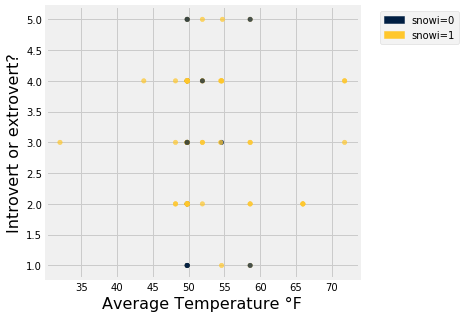

In [256]:
snow_data.scatter('Average Temperature °F', 'Introvert or extrovert?', group = "snowi") # note new syntax

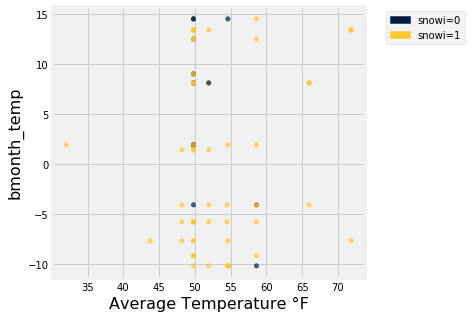

In [257]:
snow_data.scatter('Average Temperature °F', 'bmonth_temp', group = "snowi")

In [258]:
#snow_data.select("Introvert or extrovert?","How far do you travel by car annually (best estimate on scale)?","Enjoy Coding?","Age","Average Temperature °F","bmonth_temp","snowi").barh( "bmonth_temp")

In [259]:
snow_data.group("Did you grow up in a rural, suburban, or urban environment?")

"Did you grow up in a rural, suburban, or urban environment?",count
Rural,6
Suburban,52
Urban,18


##### Create table with only numerical data

In [424]:
snow_num = snow_data.select("Introvert or extrovert?","How far do you travel by car annually (best estimate on scale)?","Enjoy Coding?","Age","Average Temperature °F","bmonth_temp","snowi")
snow_num

Introvert or extrovert?,How far do you travel by car annually (best estimate on scale)?,Enjoy Coding?,Age,Average Temperature °F,bmonth_temp,snowi
3,7,5,22,32.03,1.9,1
1,5,3,18,54.61,1.9,1
2,4,4,18,58.6,1.9,1
3,4,2,19,49.8,1.9,1
2,5,4,18,49.8,1.9,0
5,8,1,18,49.8,1.9,0
3,6,3,18,49.8,1.9,0
3,5,2,22,49.8,1.9,1
2,3,3,18,49.8,1.9,0
1,3,4,18,49.8,1.9,1


### Now split sample: 60% training, 40% test

In [261]:
ntrain = int(snow_data.num_rows)
ntest = 1 - ntrain

In [262]:
shuffled_snow = snow_num.sample(with_replacement=False)
training = shuffled_snow.take(np.arange(ntrain))
testing = shuffled_snow.take(np.arange(ntrain, snow_data.num_rows))

### k-nearest neighbor training tools

In [455]:
def distance(pt1, pt2):
    """Return the distance between two points (represented as arrays)"""
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(make_array(row1), make_array(row2))

In [456]:
def distances(training, example):
    """Compute a table with the training set and distances to the example for each row in the training set."""
    dists = []
    attributes = training.drop('Class')
    for row in attributes.rows:
        dist = row_distance(row, example)
        dists.append(dist)
    return training.with_column('Distance', dists)

In [457]:
def closest(training, example, k):
    """Return a table of the k closest neighbors to example"""
    return distances(training, example).sort('Distance').take(np.arange(k))

In [458]:
def majority_class(neighbors):
    """Return the class that's most common among all these neighbors."""
    return neighbors.group('Class').sort('count', descending=True).column('Class').item(0)

In [459]:
def classify(training, example, k):
    "Return the majority class among the k nearest neighbors."
    nearest_neighbors = closest(training, example, k)
    return majority_class(nearest_neighbors)

In [460]:
def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        # Run the classifier on the ith patient in the test set
        test_patient = test_attributes.row(i)
        c = classify(training, test_patient, k)
        # Was the classifier's prediction correct?
        if c == test.column('Class').item(i):
            num_correct = num_correct + 1
    return num_correct / test.num_rows

### Now carry out same with sklearning tools

In [425]:
from sklearn.neighbors import KNeighborsClassifier

In [426]:
model = KNeighborsClassifier(n_neighbors = 5)

In [427]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [428]:
snow_df = snow_num.to_df()

In [429]:
scaler.fit(snow_df.drop('snowi', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [430]:
scaled_features = scaler.transform(snow_df.drop('snowi', axis=1))

In [431]:
scaled_data = pd.DataFrame(scaled_features, columns = snow_df.drop('snowi', axis=1).columns)

In [432]:
from sklearn.model_selection import train_test_split

In [433]:
x = scaled_data

y = snow_df['snowi']

In [434]:
x

,Introvert or extrovert?,How far do you travel by car annually (best estimate on scale)?,Enjoy Coding?,Age,Average Temperature °F,bmonth_temp
0,-0.131024,0.923307,1.759944,2.973376,-3.374956,-0.077568
1,-1.856178,0.017204,0.094847,-0.532545,0.340278,-0.077568
2,-0.993601,-0.435847,0.927395,-0.532545,0.996779,-0.077568
3,-0.131024,-0.435847,-0.737701,0.343935,-0.451142,-0.077568
4,-0.993601,0.017204,0.927395,-0.532545,-0.451142,-0.077568
...,...,...,...,...,...,...
74,0.731553,1.376359,0.927395,0.343935,-0.451142,-0.135379
75,1.594130,-1.341950,1.759944,-0.532545,-0.451142,-0.135379
76,-0.993601,0.017204,0.927395,0.343935,-0.451142,0.743338
77,-0.131024,0.470256,-0.737701,0.343935,-0.451142,0.743338


In [435]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.20)

In [436]:
from sklearn.neighbors import KNeighborsClassifier

In [437]:
model = KNeighborsClassifier(n_neighbors = 5)

In [438]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [439]:
predict = model.predict([[0,0,0,0,2.0,2.0]])
predict

array([1])

In [440]:
x_test_data

,Introvert or extrovert?,How far do you travel by car annually (best estimate on scale)?,Enjoy Coding?,Age,Average Temperature °F,bmonth_temp
60,0.731553,-1.795001,0.094847,-0.532545,-0.451142,0.639279
9,-1.856178,-0.888898,0.927395,-0.532545,-0.451142,-0.077568
31,0.731553,1.376359,0.094847,-0.532545,0.340278,-1.476577
25,0.731553,0.017204,0.094847,-1.409025,-0.719337,-1.187526
67,-0.131024,-0.888898,0.094847,1.220416,0.996779,-0.967847
8,-0.993601,-0.888898,0.094847,-0.532545,-0.451142,-0.077568
4,-0.993601,0.017204,0.927395,-0.532545,-0.451142,-0.077568
12,-0.131024,1.829410,-0.737701,-0.532545,-0.100680,1.252068
66,-0.131024,-0.888898,0.927395,-0.532545,-0.719337,-0.967847
17,-0.131024,-0.435847,-0.737701,-0.532545,-0.451142,1.252068


In [441]:
model.predict(x_test_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [442]:
y_test_data

60    1
9     1
31    1
25    1
67    1
8     0
4     0
12    1
66    1
17    1
1     1
51    1
29    1
69    1
39    0
70    1
Name: snowi, dtype: int64

In [443]:
x_test_data.count()

Introvert or extrovert?                                            16
How far do you travel by car annually (best estimate on scale)?    16
Enjoy Coding?                                                      16
Age                                                                16
Average Temperature °F                                             16
bmonth_temp                                                        16
dtype: int64

In [444]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
predictions=model.predict(x_test_data)
print("Accuracy:",metrics.accuracy_score(y_test_data, predictions))

Accuracy: 0.8125


In [445]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [446]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      1.00      0.90        13

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



In [447]:
error_rates = []
for i in np.arange(1, 13):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

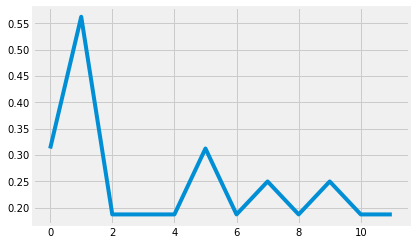

In [448]:
plt.plot(error_rates)

In [449]:
x

,Introvert or extrovert?,How far do you travel by car annually (best estimate on scale)?,Enjoy Coding?,Age,Average Temperature °F,bmonth_temp
0,-0.131024,0.923307,1.759944,2.973376,-3.374956,-0.077568
1,-1.856178,0.017204,0.094847,-0.532545,0.340278,-0.077568
2,-0.993601,-0.435847,0.927395,-0.532545,0.996779,-0.077568
3,-0.131024,-0.435847,-0.737701,0.343935,-0.451142,-0.077568
4,-0.993601,0.017204,0.927395,-0.532545,-0.451142,-0.077568
...,...,...,...,...,...,...
74,0.731553,1.376359,0.927395,0.343935,-0.451142,-0.135379
75,1.594130,-1.341950,1.759944,-0.532545,-0.451142,-0.135379
76,-0.993601,0.017204,0.927395,0.343935,-0.451142,0.743338
77,-0.131024,0.470256,-0.737701,0.343935,-0.451142,0.743338


In [452]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
# calculate min, max and limits
h= .2
X = x[["Enjoy Coding?","bmonth_temp"]].to_numpy() #Select attributes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

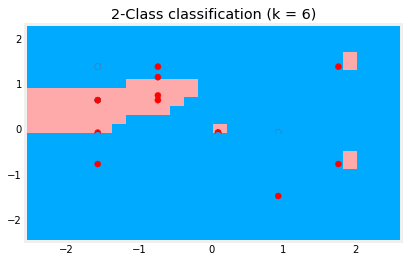

In [454]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (n_neighbors))
plt.show()

### Example using Iris data

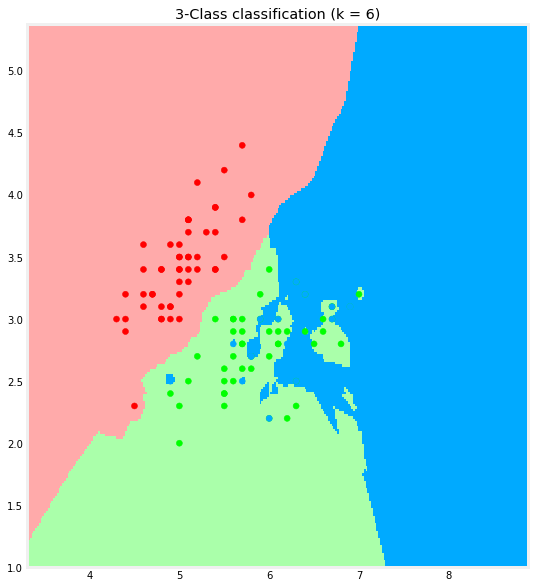

In [164]:
import matplotlib
#matplotlib.use('GTK3Agg')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 6

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()
